In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import (
    plot_decision_boundary,
    sigmoid,
    load_planar_dataset,
    load_extra_datasets,
)

%matplotlib inline
np.random.seed(1)

(2, 400)
(1, 400)


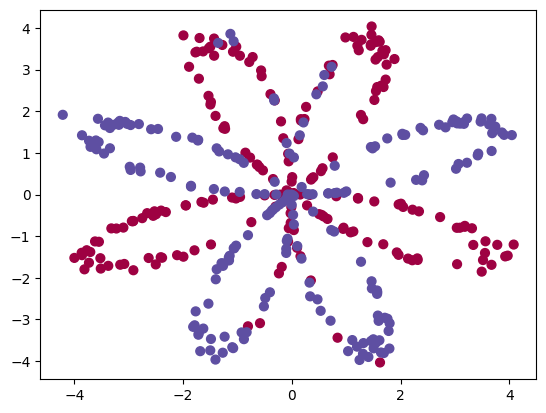

In [4]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
print(X.shape)
print(Y.shape)

## 1. Logistic Regression

In [ ]:
clf = sklearn.linear_model.LogisticRegressionCV()
# returns shape (m,) rather than m,1
Y_reshaped = Y.ravel()
clf.fit(X.T, Y_reshaped)

,Cs,10
,fit_intercept,True
,cv,None
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,None
,n_jobs,None


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


C:\Users\hp\AppData\Local\Temp\ipykernel_15108\4270068955.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


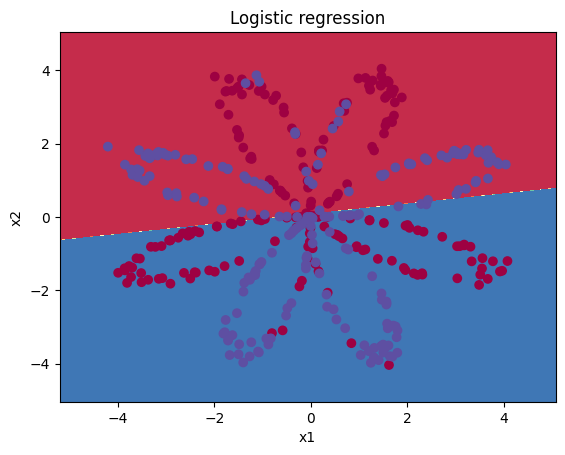

In [6]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic regression")

# print accuracy
lr_pred = clf.predict(X.T)
print(
    "Accuracy of logistic regression: %d "
    % float(
        (np.dot(Y, lr_pred) + np.dot(1 - Y, 1 - lr_pred))
        / float(Y.size)
        * 100
    )
    + "% "
    + "(percentage of correctly labelled datapoints)"
)

Interpretation: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. 
## 2. Neural Networks

In [12]:
def layer_sizes(X, Y):
  """
  Arguments:
  X -- input dataset of shape (input size, number of examples)
  Y -- labels of shape (output size, number of examples)

  Returns:
  n_x -- the size of the input layer
  n_h -- the size of the hidden layer
  n_y -- the size of the output layer
  """
  
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]
  
  return (n_x, n_h, n_y)

In [17]:
def initialize_params(nx, nh, ny):
  """
  Argument:
  n_x -- size of the input layer
  n_h -- size of the hidden layer
  n_y -- size of the output layer

  Returns:
  params -- python dictionary containing your parameters:
                  W1 -- weight matrix of shape (n_h, n_x)
                  b1 -- bias vector of shape (n_h, 1)
                  W2 -- weight matrix of shape (n_y, n_h)
                  b2 -- bias vector of shape (n_y, 1)
  """
  np.random.seed(2)

  scale_factor = 0.01
  W1 = np.random.randn(nh, nx)*scale_factor
  b1 = np.zeros((nh, 1))
  W2 = np.random.randn(ny, nh)*scale_factor
  b2 = np.zeros((ny, 1))

  params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
  return params

In [19]:
def forward_propagation(X, params):
  """
  Argument:
  X -- input data of size (n_x, m)
  parameters -- python dictionary containing your parameters (output of initialization function)

  Returns:
  A2 -- The sigmoid output of the second activation
  cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
  """
  W1 = params.get("W1")
  b1 = params.get("b1")
  W2 = params.get("W2")
  b2 = params.get("b2")

  # forward-propagation to calculate A2
  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  assert A2.shape == (1, X.shape[1])

  # values needed in back-propagation are stored in "cache"
  cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

  return A2, cache

In [ ]:
def compute_cost(A2, Y, params):
  # using the cost fn.

  m = Y.shape[1]
  logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)

  cost = float(np.squeeze(cost)) 
  # E.g., turns [[17]] into 17
  assert isinstance(cost, float)

  return cost

In [10]:
def back_propagation(params, cache, X, Y):
  """
  Implement the backward propagation using the instructions above.

  Arguments:
  parameters -- python dictionary containing our parameters
  cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
  X -- input data of shape (2, number of examples)
  Y -- "true" labels vector of shape (1, number of examples)

  Returns:
  grads -- python dictionary containing your gradients with respect to different parameters
  """
  m = X.shape[1]
  # since we used tanh so derivative = 1-a^2
  W1 = params.get("W1")
  W2 = params.get("W2")

  A1 = cache.get("A1")
  A2 = cache.get("A2")

  # back-propagation find -> dW1, db1, dW2, db2
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

  grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
  return grads

In [11]:
def update_params(params, grads, lr):
  """
  Updates parameters using the gradient descent update rule given above

  Arguments:
  parameters -- python dictionary containing your parameters
  grads -- python dictionary containing your gradients

  Returns:
  parameters -- python dictionary containing your updated parameters
  """
  W1 = params.get("W1")
  b1 = params.get("b1")
  W2 = params.get("W2")
  b2 = params.get("b2")

  dW1 = grads.get("dW1")
  db1 = grads.get("db1")
  dW2 = grads.get("dW2")
  db2 = grads.get("db2")

  W1 -= lr * dW1
  b1 -= lr * db1
  W2 -= lr * dW2
  b2 -= lr * db2

  params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
  return params

In [14]:
def nn_model(X, Y, nh, lr, itrs=10000, print_cost=False):
  nx = layer_sizes(X, Y)[0]
  ny = layer_sizes(X, Y)[2]

  params = initialize_params(nx, nh, ny)
  W1 = params["W1"]
  W2 = params["W2"]
  b2 = params["b1"]
  b2 = params["b2"]

  for i in range(0, itrs):
    A2, cache = forward_propagation(X, params)
    cost = compute_cost(A2, Y, params)
    grads = back_propagation(params, cache, X, Y)
    params = update_params(params, grads, lr)

    if print_cost and i%1000 == 0:
      print("cost after itr: %i: %f" % (i, cost))
      
  return params

In [15]:
def predict(params, X):
  """
  Using the learned parameters, predicts a class for each example in X

  Arguments:
  parameters -- python dictionary containing your parameters
  X -- input data of size (n_x, m)

  Returns
  predictions -- vector of predictions of our model (red: 0 / blue: 1)
  """

  A2, _ = forward_propagation(X, params)
  preds = A2 > 0.5

  return preds

cost after itr: 0: 0.693048
cost after itr: 1000: 0.288083
cost after itr: 2000: 0.254385
cost after itr: 3000: 0.233864
cost after itr: 4000: 0.226792
cost after itr: 5000: 0.222644
cost after itr: 6000: 0.219731
cost after itr: 7000: 0.217504
cost after itr: 8000: 0.219447
cost after itr: 9000: 0.218605


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

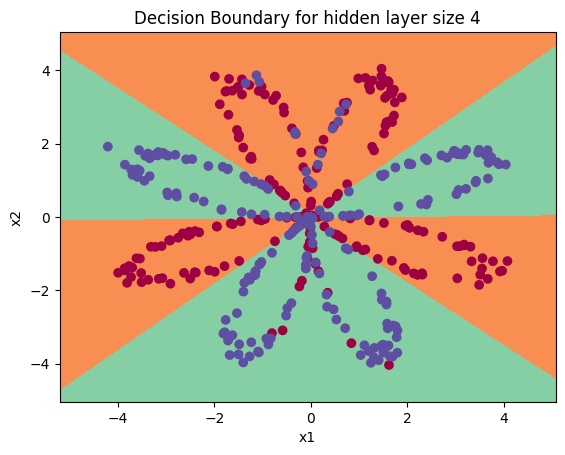

In [20]:
params = nn_model(X, Y, 4, 1.2, itrs=10000, print_cost=True)

plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [21]:
# Print accuracy
predictions = predict(params, X)
print(
    "Accuracy: %d"
    % float(
        (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))
        / float(Y.size)
        * 100
    )
    + "%"
)

Accuracy: 90%


C:\Users\hp\AppData\Local\Temp\ipykernel_15108\374051162.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


In [ ]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
  plt.subplot(5, 2, i + 1)
  plt.title("Hidden Layer of size %d" % n_h)
  parameters = nn_model(X, Y, n_h, 1.2, num_iterations=5000)
  plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
  predictions = predict(parameters, X)
  accuracy = float(
      (np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T))
      / float(Y.size)
      * 100
  )
  print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))